In [212]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
poly = np.polynomial.Polynomial

from astropy.io import ascii

from scipy.integrate import quad
from scipy.integrate import trapz
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from scipy.misc import derivative

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
easymini = ascii.read("OYEasyMini.csv", data_start = 30)
stratologger = ascii.read("OYStratologger.txt", data_start = 15)
fsORSim = ascii.read("fullscaleORSim.csv", data_start = 1)
fsORSimDayOf = ascii.read("fullscaleORSimDayOf.csv", data_start = 1)

In [214]:
#easymini
#stratologger
#fsORSimDayOf

In [215]:
emAlt = easymini["altitude"]
emPress = easymini["pressure"]
emAccel = easymini["acceleration"]
emTime = easymini["time"]
emVelBaro = easymini["baro_speed"]
emVelAccel = easymini["accel_speed"]

slAlt = stratologger["col2"]
slVel = stratologger["col3"]
slTime = stratologger["col1"]

orTime = fsORSim["time"]
orAlt = fsORSim["altitude"]
orVel = fsORSim["velocity"]
orAccel = fsORSim["acceleration"]
orDrag = fsORSim["drag"]

orTimeDO = fsORSimDayOf["time"]
orAltDO = fsORSimDayOf["altitude"]
orVelDO = fsORSimDayOf["velocity"]
orAccelDO = fsORSimDayOf["acceleration"]
orDragDO = fsORSimDayOf["drag"]

# Altitude


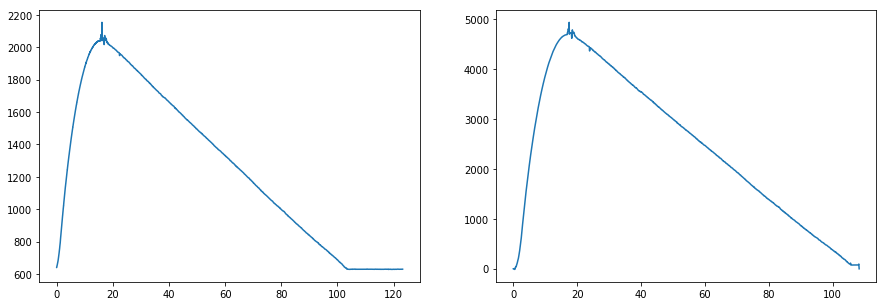

In [5]:
# base data plot

figure(figsize = (15,5))

subplot(121)
plot(emTime, emAlt)

subplot(122)
plot(slTime, slAlt)

In [6]:
# adjust all values based on first (equalize?)
# willed be called adjusted source values in future references

emAltAdj = [x-emAlt[0] for x in emAlt]
slAltAdj = [x-emAlt[0] for x in slAlt]

Text(0.5,1,'Stratologger Altitude')

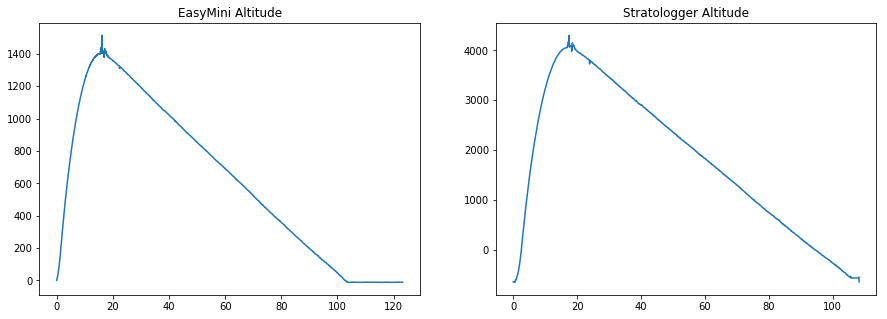

In [7]:
# plot adjusted source values

figure(figsize = (15,5))

subplot(121)
plot(emTime, emAltAdj)
title("EasyMini Altitude")

subplot(122)
plot(slTime, slAltAdj)
title("Stratologger Altitude")

In [8]:
# "smooth" altitude by determining difference between adjacent values and changing it if its within a certain value
# called numerically smoothed values in future references

emAltAdj = [x-emAlt[0] for x in emAlt] #re-make emAltAdj so you dont compound adjustments
for x in range(1, len(emAltAdj)):
    if abs(emAltAdj[x] - emAltAdj[x-1]) > 5: #5 is minimum difference to maintain accuracy and relative "smoothness"
        emAltAdj[x] = emAltAdj[x-1]
        
slAltAdj = [x-slAlt[0] for x in slAlt] #re-make slAltAdj so you dont compound adjustments
slAltAdj = [x/3.2808 for x in slAltAdj] #ft to m
for x in range(1, len(slAltAdj)):
    if abs(slAltAdj[x] - slAltAdj[x-1]) > 13: #13 is minimum difference to maintain accuracy and relative "smoothness"
        slAltAdj[x] = slAltAdj[x-1]

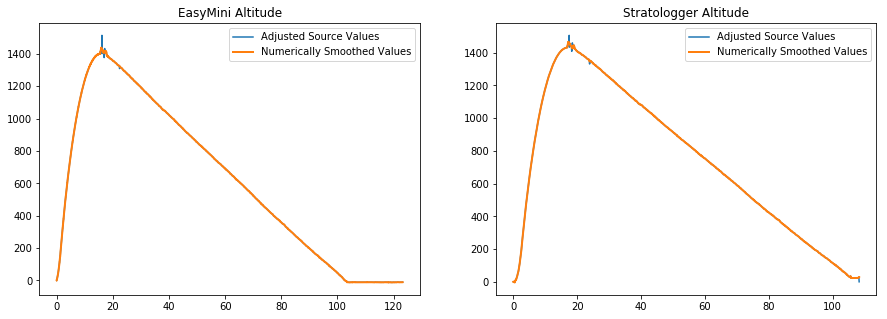

In [9]:
# plot adjusted source values to numerically smoothed values

figure(figsize = (15,5))

subplot(121)
plot(emTime, [x-emAlt[0] for x in emAlt], label = "Adjusted Source Values") #re-adjusted source values
plot(emTime, emAltAdj, lw = 2, label = "Numerically Smoothed Values")
title("EasyMini Altitude")
legend()

subplot(122)
plot(slTime, [(x-slAlt[0])/3.2808 for x in slAlt], label = "Adjusted Source Values") #ft to m and re-adjusted values
plot(slTime, slAltAdj, lw = 2, label = "Numerically Smoothed Values")
title("Stratologger Altitude")
legend()

In [10]:
# print numerically smoothed max altitude

print "(EM) Maximum altitude (m):", max(emAltAdj)
print "(EM) Maximum altitude (ft):", max(emAltAdj)*3.2808

print "(SL) Maximum altitude (m):", max(slAltAdj)
print "(SL) Maximum altitude (ft):", max(slAltAdj)*3.2808

(EM) Maximum altitude (m): 1438.2700000000002
(EM) Maximum altitude (ft): 4718.676216000001
(SL) Maximum altitude (m): 1466.7154352596926
(SL) Maximum altitude (ft): 4812.0


In [11]:
# gaussian smoothing

emAltSmooth = gaussian_filter1d(emAltAdj, 15)
slAltSmooth = gaussian_filter1d(slAltAdj, 15)

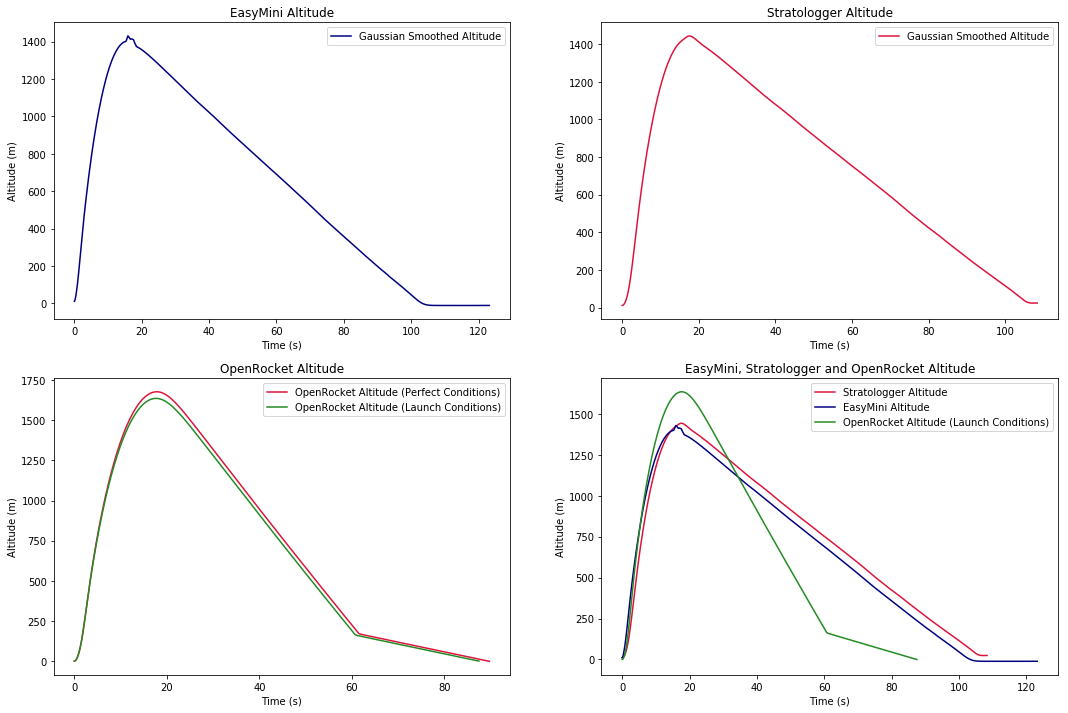

In [216]:
# plot gaussian smoothed values

figure(figsize = (18,12))

subplot(221)
#plot(emTime, emAltAdj, lw = 2, label = "Numerically Smoothed Altitude")
plot(emTime, emAltSmooth, label = "Gaussian Smoothed Altitude", color = "navy")
title("EasyMini Altitude")
legend()
xlabel("Time (s)")
ylabel("Altitude (m)")

subplot(222)
#plot(slTime, slAltAdj, lw = 2, label = "Numerically Smoothed Altitude")
plot(slTime, slAltSmooth, label = "Gaussian Smoothed Altitude", color = "crimson")
title("Stratologger Altitude")
legend()
xlabel("Time (s)")
ylabel("Altitude (m)")

subplot(223)
plot(orTime, orAlt, label = "OpenRocket Altitude (Perfect Conditions)", color = "crimson")
plot(orTimeDO, orAltDO, label = "OpenRocket Altitude (Launch Conditions)", color = "forestgreen")
title("OpenRocket Altitude")
legend()
xlabel("Time (s)")
ylabel("Altitude (m)")

subplot(224)
plot(slTime, slAltSmooth, label = "Stratologger Altitude",  color = "crimson")
plot(emTime, emAltSmooth, label = "EasyMini Altitude", color = "navy")
plot(orTimeDO, orAltDO, label = "OpenRocket Altitude (Launch Conditions)", color = "forestgreen")
title("EasyMini, Stratologger and OpenRocket Altitude")
legend()
xlabel("Time (s)")
ylabel("Altitude (m)")

savefig("fsaltitude.png")
show()

In [13]:
# print gaussian smoothed max altitudes

print "(EM) Maximum altitude (m):", max(emAltSmooth)
print "(EM) Maximum altitude (ft):", max(emAltSmooth)*3.2808

print "(SL) Maximum altitude (m):", max(slAltSmooth)
print "(SL) Maximum altitude (ft):", max(slAltSmooth)*3.2808

(EM) Maximum altitude (m): 1430.2862703859578
(EM) Maximum altitude (ft): 4692.483195882251
(SL) Maximum altitude (m): 1444.1520560862884
(SL) Maximum altitude (ft): 4737.974065607896


# Velocity

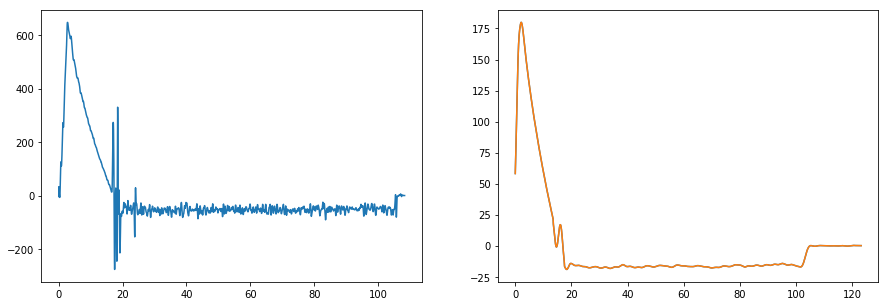

In [32]:
# base data plot
figure(figsize = (15,5))

subplot(121)
plot(slTime, slVel)

subplot(122)
plot(emTime, emVelAccel)
plot(emTime, emVelBaro)

In [33]:
emVel = [0.0] + [dx / dt for dx, dt in zip(diff(emAlt), diff(emTime))]

c:\python27\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


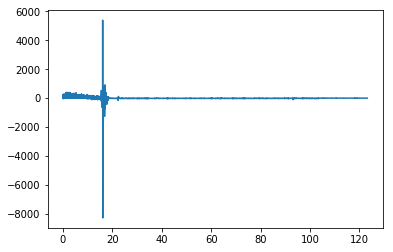

In [35]:
# base data plot

plot(emTime, emVel)

In [36]:
emVelAdj = list(emVel)
slVelAdj = list(slVel)
slVelAdj = [x/3.2808 for x in slVelAdj] #ft to m

In [37]:
# "smooth" velocity by determining difference between adjacent values and changing it if its within a certain value
# called numerically smoothed values in future references

for x in range(1, len(emVelAdj)):
    if abs(emVelAdj[x] - emVelAdj[x-1]) > 40: #5 is minimum difference to maintain accuracy and relative "smoothness"
        #emVelAdj[x] = (emVelAdj[x-1] + emVelAdj[x])/2
        emVelAdj[x] = emVelAdj[x-1]
        
for x in range(1, len(slVelAdj)):
    if abs(slVelAdj[x] - slVelAdj[x-1]) > 50:
        #slVelAdj[x] = (slVelAdj[x-1] + slVelAdj[x])/2
        slVelAdj[x] = slVelAdj[x-1]

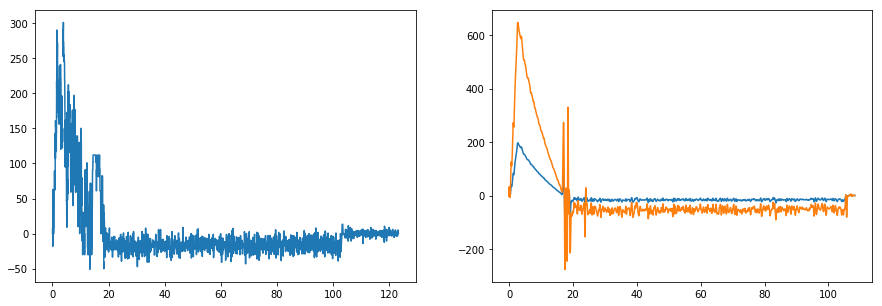

In [41]:
# base data plot

figure(figsize = (15,5))

subplot(121)
plot(emTime, emVelAdj)

subplot(122)
plot(slTime, slVelAdj)
plot(slTime, slVel)

In [21]:
emVelAdj2 = list(emVel)
slVelAdj2 = list(slVel)
slVelAdj2 = [x/3.2808 for x in slVelAdj2] #ft to m

emVelAdj2 = gaussian_filter1d(emVelAdj2, 3)
slVelAdj2 = gaussian_filter1d(slVelAdj2, 5)

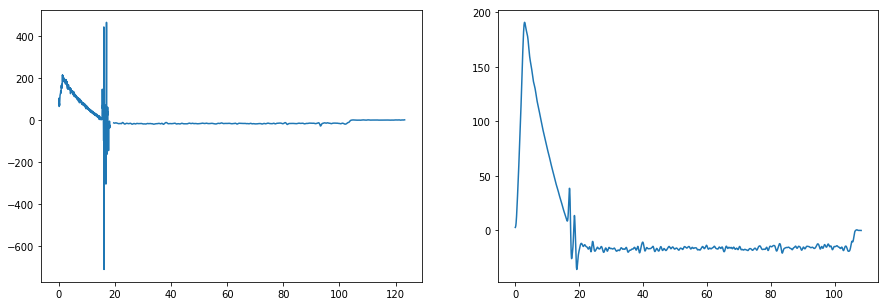

In [22]:
# base data plot

figure(figsize = (15,5))

subplot(121)
plot(emTime, emVelAdj2)

subplot(122)
plot(slTime, slVelAdj2)

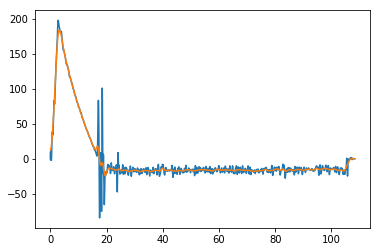

In [71]:
slVel = stratologger["col3"]
slVel = [x/3.2808 for x in slVel]

slVelSmooth = gaussian_filter1d(slVel, 10)

plot(slTime,slVel)
plot(slTime,slVelSmooth)

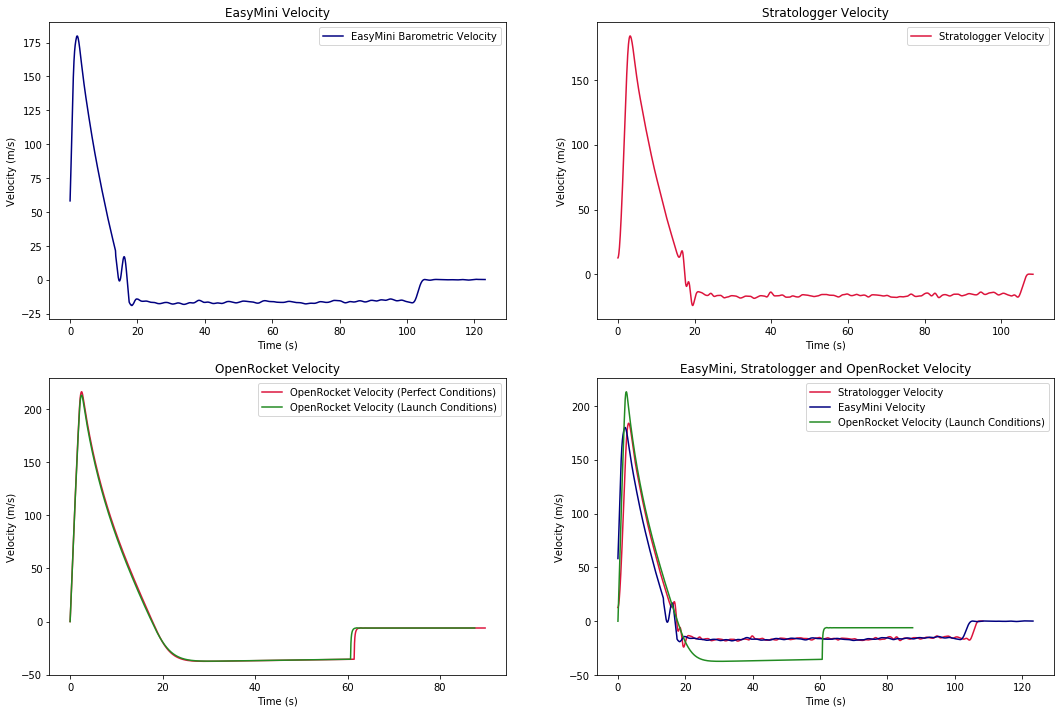

In [217]:
# base data plot

figure(figsize = (18,12))

subplot(221)
plot(emTime, emVelBaro, label = "EasyMini Barometric Velocity", color = "navy")
title("EasyMini Velocity")
legend()
xlabel("Time (s)")
ylabel("Velocity (m/s)")

subplot(222)
plot(slTime, slVelSmooth, label = "Stratologger Velocity", color = "crimson")
legend()
title("Stratologger Velocity")
xlabel("Time (s)")
ylabel("Velocity (m/s)")

subplot(223)
plot(orTime, orVel, label = "OpenRocket Velocity (Perfect Conditions)", color = "crimson")
plot(orTimeDO, orVelDO, label = "OpenRocket Velocity (Launch Conditions)", color = "forestgreen")
title("OpenRocket Velocity")
legend()
xlabel("Time (s)")
ylabel("Velocity (m/s)")

subplot(224)
plot(slTime, slVelSmooth, label = "Stratologger Velocity", color = "crimson")
plot(emTime, emVelBaro, label = "EasyMini Velocity", color = "navy")
plot(orTimeDO, orVelDO, label = "OpenRocket Velocity (Launch Conditions)", color = "forestgreen")
legend()
title("EasyMini, Stratologger and OpenRocket Velocity")
xlabel("Time (s)")
ylabel("Velocity (m/s)")

savefig("fsvelocity.png")
show()

In [73]:
# print gaussian smoothed max velocites

print "(EM) Maximum velocity (m/s):", max(emVelBaro)
print "(EM) Maximum velocity (ft/s):", max(emVelBaro)*3.2808

print "(SL) Maximum velocity (m/s):", max(slVelSmooth)
print "(SL) Maximum velocity (ft/s):", max(slVelSmooth)*3.2808

(EM) Maximum velocity (m/s): 179.92
(EM) Maximum velocity (ft/s): 590.281536
(SL) Maximum velocity (m/s): 183.83819041872323
(SL) Maximum velocity (ft/s): 603.1363351257472


# Acceleration

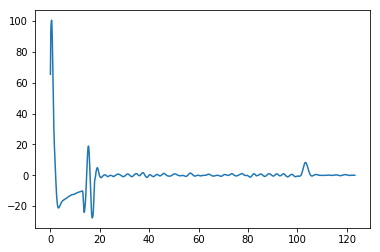

In [74]:
plot(emTime, emAccel)

In [95]:
slAccel = [0.0] + [dx / dt for dx, dt in zip(diff(slVel), diff(slTime))]

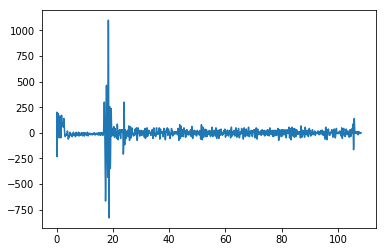

In [96]:
plot(slTime,slAccel)

In [97]:
slAccelSmooth = gaussian_filter1d(slAccel, 6)

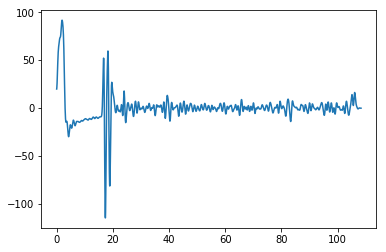

In [98]:
plot(slTime, slAccelSmooth)

In [155]:
slAccel2 = list(slAccel)
for x in range(1, len(slAccel)):
    if abs(slAccel2[x] - slAccel2[x-1]) > 50:
        slAccel2[x] = slAccel2[x-1]

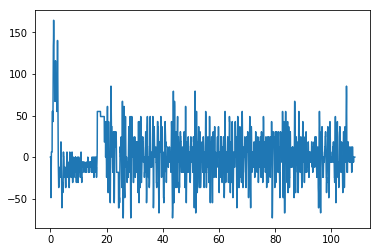

In [156]:
plot(slTime, slAccel2)

In [167]:
slAccel2Smooth = gaussian_filter1d(slAccel2, 6)

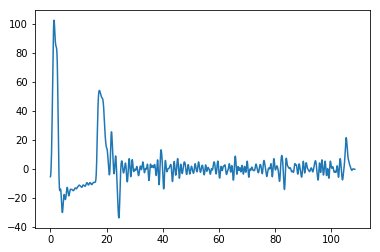

In [168]:
plot(slTime, slAccel2Smooth)

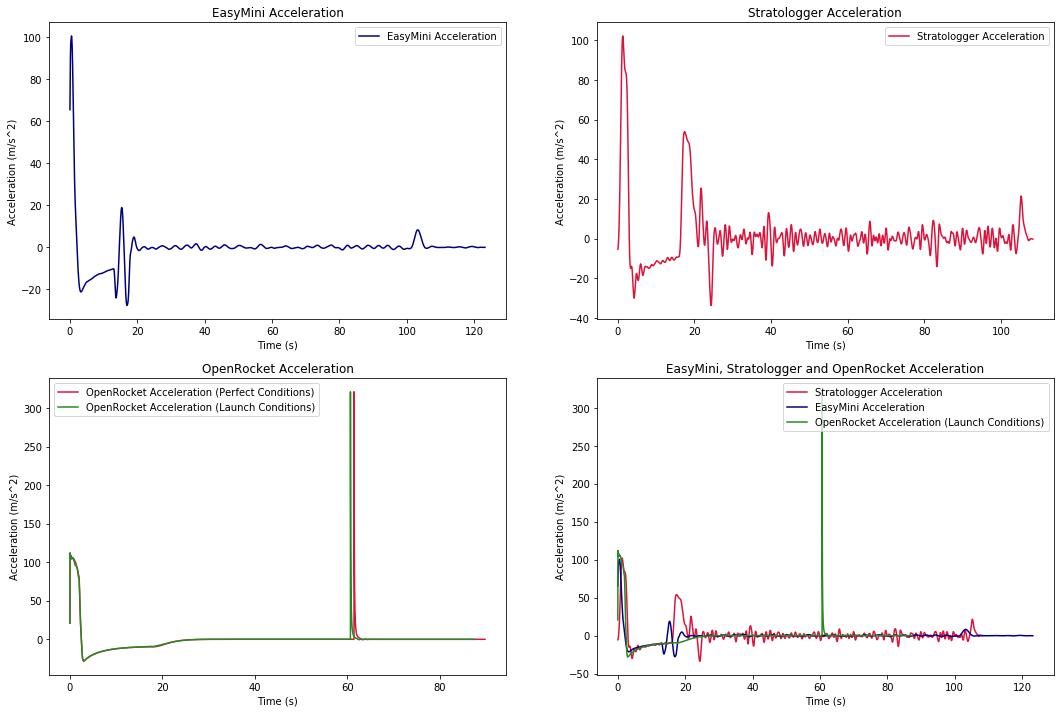

In [218]:
# base data plot

figure(figsize = (18,12))

subplot(221)
plot(emTime, emAccel, label = "EasyMini Acceleration", color = "navy")
title("EasyMini Acceleration")
legend()
xlabel("Time (s)")
ylabel("Acceleration (m/s^2)")

subplot(222)
plot(slTime, slAccel2Smooth, label = "Stratologger Acceleration", color = "crimson")
legend()
title("Stratologger Acceleration")
xlabel("Time (s)")
ylabel("Acceleration (m/s^2)")

subplot(223)
plot(orTime, orAccel, label = "OpenRocket Acceleration (Perfect Conditions)", color = "crimson")
plot(orTimeDO, orAccelDO, label = "OpenRocket Acceleration (Launch Conditions)", color = "forestgreen")
title("OpenRocket Acceleration")
legend()
xlabel("Time (s)")
ylabel("Acceleration (m/s^2)")

subplot(224)
plot(slTime, slAccel2Smooth, label = "Stratologger Acceleration", color = "crimson")
plot(emTime, emAccel, label = "EasyMini Acceleration", color = "navy")
plot(orTimeDO, orAccelDO, label = "OpenRocket Acceleration (Launch Conditions)", color = "forestgreen")
legend()
title("EasyMini, Stratologger and OpenRocket Acceleration")
xlabel("Time (s)")
ylabel("Acceleration (m/s^2)")

savefig("fsacceleration.png")
show()

In [172]:
# print gaussian smoothed max accelerations

print "(EM) Maximum acceleration (m/s^2):", max(emAccel)
print "(EM) Maximum acceleration (ft/s^2):", max(emAccel)*3.2808

print "(SL) Maximum acceleration (m/s^2):", max(slAccel2Smooth)
print "(SL) Maximum acceleration (ft/s^2):", max(slAccel2Smooth)*3.2808

(EM) Maximum acceleration (m/s^2): 100.59
(EM) Maximum acceleration (ft/s^2): 330.01567200000005
(SL) Maximum acceleration (m/s^2): 102.27249137191899
(SL) Maximum acceleration (ft/s^2): 335.53558969299183
